Aluno: Pedro Siade Ferreira

Matricula: 202004734

Parte 3

In [35]:
%matplotlib inline
import cv2 # importa opencv
import numpy as np # importa numpy
import matplotlib.pyplot as plt
import math
import sys

In [36]:

def filtroTamanhoArbitrario(img, filtro):
  M, N = img.shape
  s = 1 / np.sum(filtro) #suma dos coeficientes da matriz do filtro a fim de normalizar a mesma
  K = int(math.floor(len(filtro[0]) / 2))
  L = int(math.floor(len(filtro) / 2))
  imgFiltrada = img.copy() #copia da imagem a fim de não modificar a principal e causar erros
  for v in range(L, N - L):   #Como range varia de L ate N-L-1, diferentemente do cod em java do livro, aqui será N-L
    for u in range(K, M - K):
      sum = 0
      for j in range(-L, L+1):
        for i in range(-K, K+1):
          p = img[u+i, v+j]
          c = filtro[j+L-1][i+K-1]
          sum = sum + (c * p)
      q = np.round(sum * s)
      if q < 0:
         q = 0
      elif q > 255:
         q = 255
      imgFiltrada[u, v] = q
  return imgFiltrada

Criando o impulso e plotando o mesmo:

In [37]:
def pulse(L,C):
    pulse = np.zeros((L, C))
    pulse[int(np.floor(L/2)),int(np.floor(C/2))]=1 #elemento central
    return pulse

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


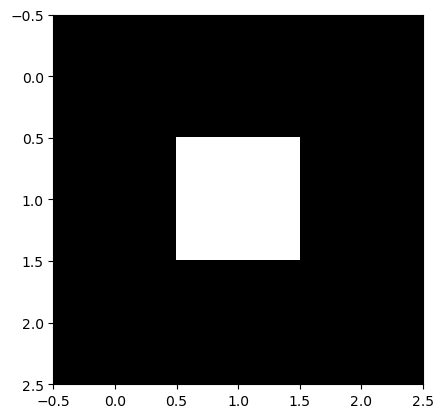

In [38]:
impulso= pulse(3,3)
print(impulso)
plt.imshow(impulso, cmap='gray')

Verificando oque acontece com a imagem quando convoluí a mesma com o impulso:

In [39]:
imagem = cv2.imread('Imagens/lena.png', cv2.IMREAD_GRAYSCALE)
L, C = imagem.shape


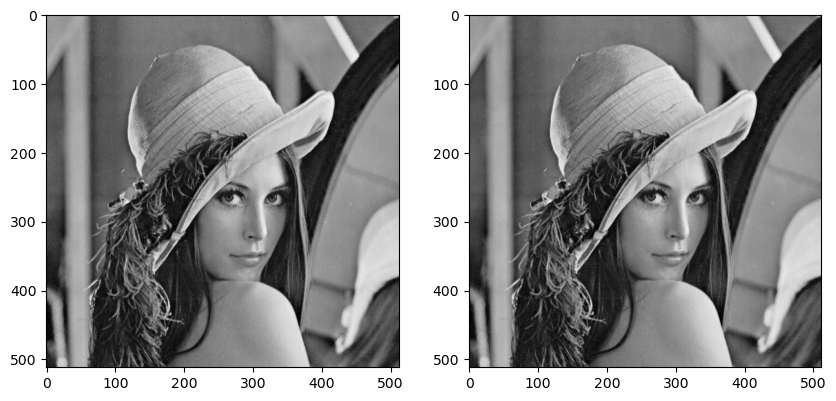

In [40]:
imgFiltrada = filtroTamanhoArbitrario(imagem,impulso)
fig = plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(imgFiltrada, cmap='gray')

Analisando-se as imagens fica claro que ambas são idênticas, logo comprova-se assim a propriedade de que a imagem convoluída com o impulso retorna a própria imagem, consequentemente o impulso é a função identidade da convolução.

Testando propriedades da convolução e identidade do impulso:

In [41]:
filtro =np.ones((10,10))
print(filtro)
filtroConvoluido = filtroTamanhoArbitrario(filtro,impulso)
print(filtroConvoluido)


[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


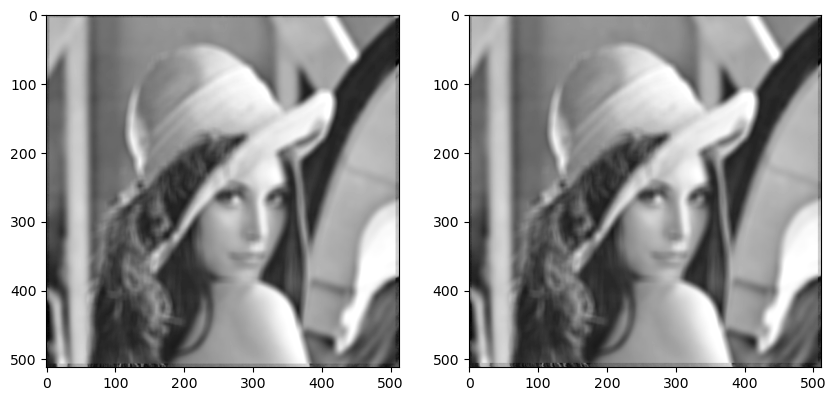

In [42]:
imgFiltrada = filtroTamanhoArbitrario(imagem,filtro)
imgFiltrada2 = filtroTamanhoArbitrario(filtroTamanhoArbitrario(imagem, filtro),impulso)
fig = plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.imshow(imgFiltrada, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(imgFiltrada2, cmap='gray')


Na imagem à esquerda foi aplicado somente o filtro, já na segunda primeiramente aplicou-se o filtro e posteriormente aplicou-se o impulso, no entanto como esperado o resultado em ambos os casos foram idênticos por conta que o impulso como visto funciona como identidade.

Convolução do pulso delta com um filtro Gaussiano simétrico:

In [43]:

def montarFiltroGaussiano(m,n, sigma):
  h = np.zeros((m,n), dtype = np.float32)
  a = (m-1)/2
  b = (n-1)/2
  for x in range(m):
        for y in range(n):
              h[x,y] =np.exp(-(((x-a)**2) + ((y-b)**2))/(2*(sigma**2)))
  h = h/np.sum(h)
  return h

In [44]:
g33=montarFiltroGaussiano(3,3, 1)
g44=montarFiltroGaussiano(4,4, 1)
print(g33)
print('---------------')
print(g44)
impulso10=pulse(10,10)


[[0.07511361 0.12384141 0.07511361]
 [0.12384141 0.20417996 0.12384141]
 [0.07511361 0.12384141 0.07511361]]
---------------
[[0.01808237 0.04915299 0.04915299 0.01808237]
 [0.04915299 0.13361166 0.13361166 0.04915299]
 [0.04915299 0.13361166 0.13361166 0.04915299]
 [0.01808237 0.04915299 0.04915299 0.01808237]]


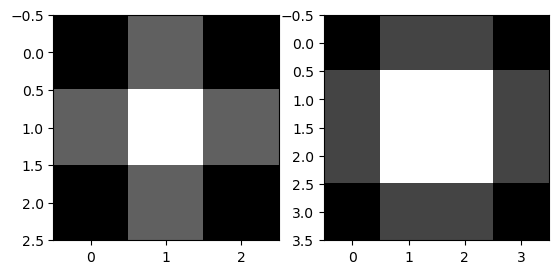

In [45]:

plt.subplot(1, 2, 1)
plt.imshow(g33, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(g44, cmap='gray')


[[0.07511361 0.12384141 0.07511361]
 [0.12384141 0.20417996 0.12384141]
 [0.07511361 0.12384141 0.07511361]]
---------------
[[0.01808237 0.04915299 0.04915299 0.01808237]
 [0.04915299 0.13361166 0.13361166 0.04915299]
 [0.04915299 0.13361166 0.13361166 0.04915299]
 [0.01808237 0.04915299 0.04915299 0.01808237]]


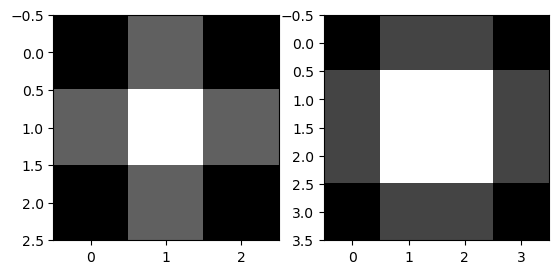

In [46]:
gaussiano2=filtroTamanhoArbitrario(g33, impulso10)
gaussiano3=filtroTamanhoArbitrario(g44, impulso10)

fig = plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(gaussiano2, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(gaussiano3, cmap='gray')



print(gaussiano2)
print('---------------')
print(gaussiano3)







Percebe-se que os resultados acimam compravam a figura 5.12, haja vista que o resultado da convolução foi o filtro gaussiano, como aconteceu na mesma.

Se o pulso for maior 2x2 / 3x3:

In [47]:
def pulse2x2(L,C):
    pulse = np.zeros((L, C))
    pulse[int(np.floor(L/2-1)),int(np.floor(C/2-1))]=1
    pulse[int(np.floor(L/2-1)),int(np.floor(C/2))]=1
    pulse[int(np.floor(L/2)),int(np.floor(C/2-1))]=1
    pulse[int(np.floor(L/2)),int(np.floor(C/2))]=1
    return pulse

In [48]:
impulso2x2=pulse2x2(10,10)
print(impulso2x2)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


[[0.07511361 0.12384141 0.07511361]
 [0.12384141 0.20417996 0.12384141]
 [0.07511361 0.12384141 0.07511361]]


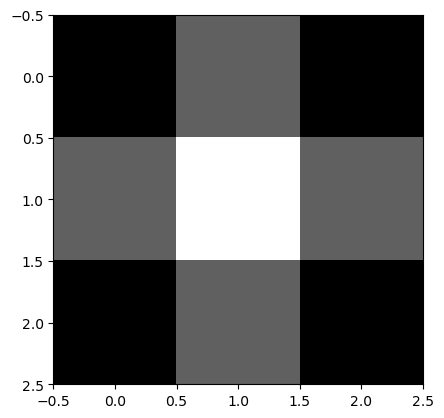

In [49]:
gaussiano2x2=filtroTamanhoArbitrario(g33, impulso2x2)
plt.imshow(gaussiano2x2, cmap='gray')
print(gaussiano2x2)



In [50]:
pulso3x3 = [[0,0,0,0,0],
                    [0,1,1,1,0],
                    [0,1,1,1,0],
                    [0,1,1,1,0],
                    [0,0,0,0,0],
           ]

[[0.07511361 0.12384141 0.07511361]
 [0.12384141 0.20417996 0.12384141]
 [0.07511361 0.12384141 0.07511361]]


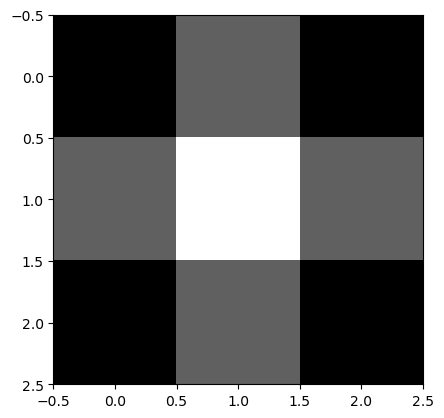

In [51]:
gaussiano3x3=filtroTamanhoArbitrario(g33, pulso3x3)
plt.imshow(gaussiano3x3, cmap='gray')
print(gaussiano2x2)



Não consegui observar diferença entre os resultados, portanto pulso de tamanho distintos não alteram a imagem, como também o tamanho da matriz do pulso.